In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dv = pd.read_csv('data/DV13L99005736.csv', index_col=0, names=['va', 'vb', 'vc', 'pt'])

In [4]:
dv.head()

,va,vb,vc,pt
2015/06/01 02:00:00,241.0,241.0,241.0,220/220
2015/06/01 03:00:00,242.0,242.0,242.0,220/220
2015/06/01 04:00:00,242.0,242.0,242.0,220/220
2015/06/01 05:00:00,242.0,242.0,242.0,220/220
2015/06/01 06:00:00,242.0,242.0,242.0,220/220


In [20]:
dl = pd.read_csv('data/DL13L99005736.csv', index_col=0, names=['ca', 'cb', 'cc', 'ct'])

In [7]:
dl.head()

,ca,cb,cc,ct
2015/06/01 02:00:00,0.04,0.00,0.04,600/5
2015/06/01 03:00:00,0.04,0.00,0.05,600/5
2015/06/01 04:00:00,0.04,0.00,0.05,600/5
2015/06/01 05:00:00,0.03,0.11,0.16,600/5
2015/06/01 06:00:00,0.04,0.00,0.05,600/5


In [21]:
fh = pd.read_csv('data/FH13L99005736.csv', index_col=0, header=None)

In [9]:
fh.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,,,,,,,,,,,,,,,,,
2015/06/01 00:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2015/06/01 01:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2015/06/01 02:00:00,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2015/06/01 03:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2015/06/01 04:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [22]:
fh = fh[[1, 2, 3, 4, 13, 14, 15, 16]]

In [13]:
fh.head()

,1,2,3,4,13,14,15,16
0,,,,,,,,
2015/06/01 00:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015/06/01 01:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015/06/01 02:00:00,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015/06/01 03:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015/06/01 04:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dv.index = pd.to_datetime(dv.index)
dl.index = pd.to_datetime(dl.index)
fh.index = pd.to_datetime(fh.index)

In [35]:
fh.tail()

,1,2,3,4,13,14,15,16
0,,,,,,,,
2016-04-13 19:00:00,0.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 20:00:00,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 21:00:00,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 22:00:00,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 23:00:00,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dv = dv[['va', 'vb', 'vc']]
dl = dl[['ca', 'cb', 'cc']]

In [25]:
dv = dv.resample('H').mean()
dv = dv.sort_index()
dl = dl.resample('H').mean()
dl = dl.sort_index()
fh = fh.resample('H').mean()
fh = fh.sort_index()

In [26]:
dv.head()

,va,vb,vc
2015-05-01 00:00:00,240.0,240.0,240.0
2015-05-01 01:00:00,240.0,240.0,240.0
2015-05-01 02:00:00,241.0,241.0,241.0
2015-05-01 03:00:00,241.0,241.0,241.0
2015-05-01 04:00:00,241.0,241.0,242.0


In [27]:
dl.head()

,ca,cb,cc
2015-05-01 00:00:00,0.02,0.00,0.0
2015-05-01 01:00:00,0.01,0.00,0.0
2015-05-01 02:00:00,0.01,0.00,0.0
2015-05-01 03:00:00,0.01,0.00,0.0
2015-05-01 04:00:00,0.01,0.03,0.0


In [33]:
df = pd.concat([dv, dl, fh], axis=1, sort=False)

In [36]:
df['20150601':'20160401']

,va,vb,vc,ca,cb,cc,1,2,3,4,13,14,15,16
2015-06-01 00:00:00,240.0,241.0,240.0,0.03,0.00,0.04,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 01:00:00,241.0,241.0,241.0,0.04,0.00,0.04,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 02:00:00,241.0,241.0,241.0,0.04,0.00,0.04,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 03:00:00,242.0,242.0,242.0,0.04,0.00,0.05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 04:00:00,242.0,242.0,242.0,0.04,0.00,0.05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 05:00:00,242.0,242.0,242.0,0.03,0.11,0.16,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 06:00:00,242.0,242.0,242.0,0.04,0.00,0.05,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 07:00:00,241.0,241.0,240.0,0.06,0.03,0.07,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 08:00:00,237.0,237.0,237.0,0.03,0.00,0.05,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01 09:00:00,230.0,230.0,230.0,0.07,0.00,0.07,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df[13].dropna()

Series([], Freq: H, Name: 13, dtype: float64)

In [39]:
df = df['20150601':'20160403']

In [45]:
df1 = df['20150601':'20150701']

报装容量400， ct 120

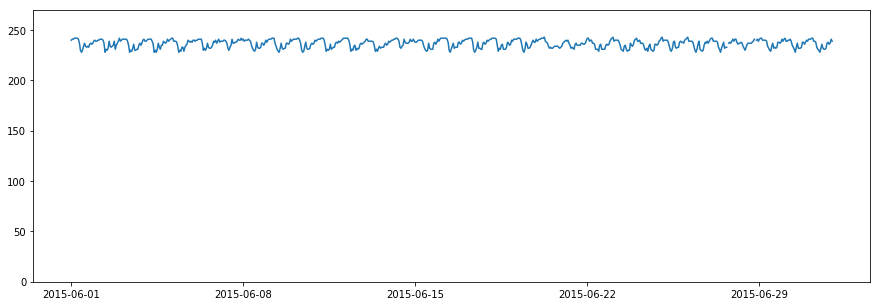

In [47]:
fig = plt.figure(figsize=(15, 5))
plt.plot(df1['va'])
plt.ylim([0, 270])
plt.show()

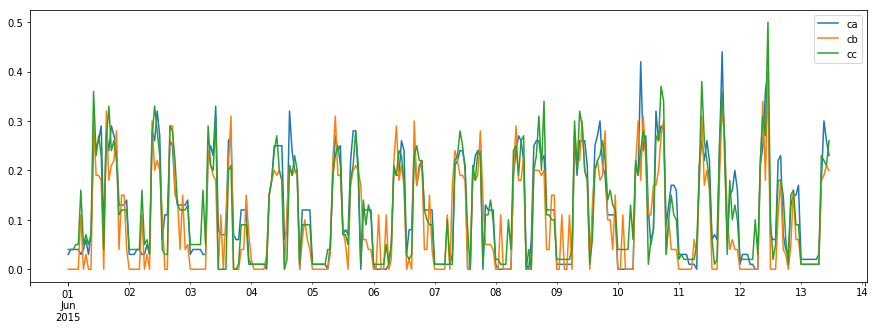

In [59]:
df1.iloc[:300, [3,4, 5]].plot(figsize=(15, 5))
plt.show()

In [60]:
dv = pd.read_csv('data/DV00648967.csv', index_col=0, names=['va', 'vb', 'vc', 'pt'])
dl = pd.read_csv('data/DL00648967.csv', index_col=0, names=['ca', 'cb', 'cc', 'ct'])
fh = pd.read_csv('data/FH00648967.csv', index_col=0, header=None)

In [61]:
fh = fh[[1, 2, 3, 4, 13, 14, 15, 16]]
dv = dv[['va', 'vb', 'vc']]
dl = dl[['ca', 'cb', 'cc']]
dv.index = pd.to_datetime(dv.index)
dl.index = pd.to_datetime(dl.index)
fh.index = pd.to_datetime(fh.index)
dv = dv.resample('H').mean()
dv = dv.sort_index()
dl = dl.resample('H').mean()
dl = dl.sort_index()
fh = fh.resample('H').mean()
fh = fh.sort_index()

In [62]:
dv.head()

,va,vb,vc
2015-05-01 00:00:00,240.7,229.2,238.8
2015-05-01 01:00:00,236.0,235.5,239.9
2015-05-01 02:00:00,234.7,235.7,238.1
2015-05-01 03:00:00,235.6,235.1,240.1
2015-05-01 04:00:00,NaN,NaN,NaN


In [63]:
dl.head()

,ca,cb,cc
2015-05-01 00:00:00,0.0,0.0,0.0
2015-05-01 01:00:00,0.0,0.0,0.0
2015-05-01 02:00:00,0.0,0.0,0.0
2015-05-01 03:00:00,0.0,0.0,0.0
2015-05-01 04:00:00,NaN,NaN,NaN


In [64]:
dl.tail()

,ca,cb,cc
2016-07-03 19:00:00,2.30,1.08,0.0
2016-07-03 20:00:00,1.75,1.06,0.0
2016-07-03 21:00:00,2.19,1.26,0.0
2016-07-03 22:00:00,2.02,1.70,0.0
2016-07-03 23:00:00,2.38,1.39,0.0


In [65]:
fh.head()

,1,2,3,4,13,14,15,16
0,,,,,,,,
2015-07-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
fh.tail()

,1,2,3,4,13,14,15,16
0,,,,,,,,
2016-04-13 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-13 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
fh.dropna(how='all')

,1,2,3,4,13,14,15,16
0,,,,,,,,


In [70]:
df = pd.concat([dv, dl], axis=1)

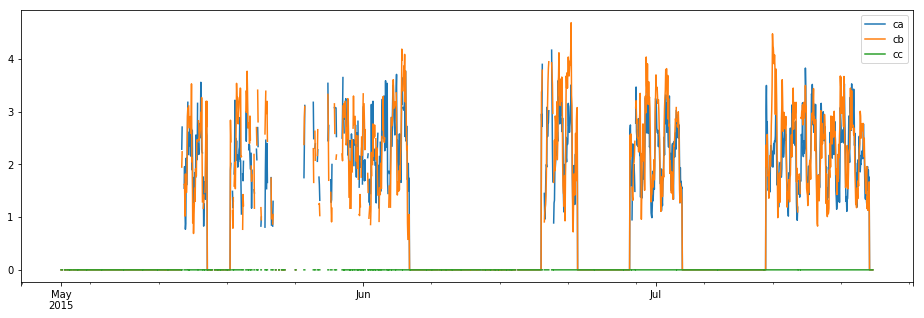

In [77]:
df.iloc[:2000, [3, 4, 5]].plot(figsize=(16, 5))
plt.show()

In [21]:
dv = pd.read_csv('data/DV04572904.csv', index_col=0, names=['va', 'vb', 'vc', 'pt'])
dl = pd.read_csv('data/DL04572904.csv', index_col=0, names=['ca', 'cb', 'cc', 'ct'])
fh = pd.read_csv('data/FH04572904.csv', index_col=0, header=None)

In [22]:
fh = fh[[1, 2, 3, 4, 13, 14, 15, 16]]
dv = dv[['va', 'vb', 'vc']]
dl = dl[['ca', 'cb', 'cc']]
dv.index = pd.to_datetime(dv.index)
dl.index = pd.to_datetime(dl.index)
fh.index = pd.to_datetime(fh.index)
dv = dv.resample('H').mean()
dv = dv.sort_index()
dl = dl.resample('H').mean()
dl = dl.sort_index()
fh = fh.resample('H').mean()
fh = fh.sort_index()

In [23]:
df = pd.concat([dv, dl, fh], axis=1)

In [26]:
df = df[['va', 'vb', 'vc', 'ca', 'cb', 'cc', 1]].dropna()

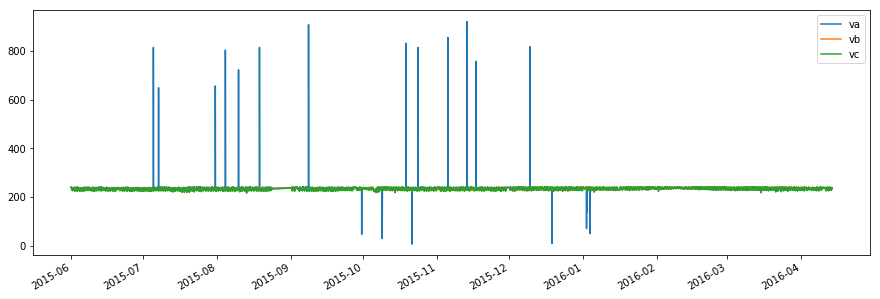

In [27]:
df[['va', 'vb', 'vc']].plot(figsize=(15, 5))
plt.show()

In [35]:
df[df['va'] > 400]

,va,vb,vc,ca,cb,cc,1
2015-07-05 09:00:00,814.0,227.0,226.0,0.56,0.48,0.57,0.2661
2015-07-07 13:00:00,649.0,235.0,235.0,0.01,0.00,0.09,0.0263
2015-07-31 06:00:00,656.0,235.0,235.0,0.01,0.00,0.07,0.0188
2015-08-04 11:00:00,803.0,227.0,225.0,0.91,0.95,1.00,0.5017
2015-08-09 23:00:00,722.0,234.0,233.0,0.01,0.00,0.24,0.0574
2015-08-18 17:00:00,814.0,233.0,232.0,0.25,0.29,0.51,0.1797
2015-09-08 05:00:00,907.0,237.0,237.0,0.00,0.00,0.14,0.0346
2015-10-18 23:00:00,831.0,237.0,237.0,0.00,0.00,0.00,0.0021
2015-10-24 00:00:00,814.0,237.0,237.0,0.04,0.00,0.00,0.0111
2015-11-05 10:00:00,855.0,227.0,228.0,0.14,0.16,0.13,0.2084


In [36]:
df[df['va'] < 200]

,va,vb,vc,ca,cb,cc,1
2015-09-30 10:00:00,47.0,229.0,229.0,0.00,0.00,0.00,0.0000
2015-10-09 00:00:00,30.0,240.0,240.0,0.00,0.00,0.00,0.0000
2015-10-21 11:00:00,7.0,228.0,229.0,0.27,0.24,0.26,0.1557
2015-12-18 23:00:00,10.0,240.0,239.0,0.01,0.00,0.00,0.0034
2016-01-02 09:00:00,71.0,230.0,230.0,0.64,0.71,0.68,0.2722
2016-01-02 15:00:00,138.0,229.0,230.0,0.46,0.53,0.52,0.1667
2016-01-03 18:00:00,50.0,240.0,240.0,0.00,0.00,0.00,0.0001


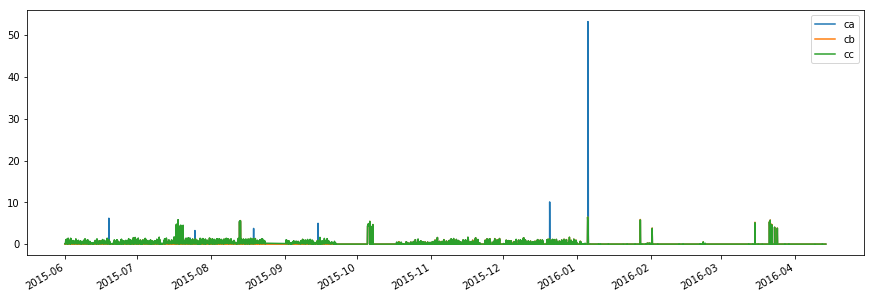

In [37]:
df[['ca', 'cb', 'cc']].plot(figsize=(15, 5))
plt.show()

In [41]:
df[df['ca'] > 5]

,va,vb,vc,ca,cb,cc,1
2015-06-19 09:00:00,232.0,231.0,229.0,6.20,0.65,0.77,0.3308
2015-07-18 08:00:00,223.0,220.0,220.0,5.82,5.77,5.86,2.7862
2015-08-13 00:00:00,230.0,229.0,228.0,5.43,5.33,5.50,3.0247
2015-08-13 08:00:00,218.0,218.0,217.0,5.58,5.65,5.62,3.1788
2015-08-13 09:00:00,220.0,218.0,219.0,5.29,5.38,5.32,2.7276
2015-10-06 08:00:00,220.0,220.0,220.0,5.05,5.06,5.06,2.6894
2015-10-06 10:00:00,219.0,218.0,219.0,5.40,5.44,5.45,2.8309
2015-12-20 14:00:00,230.0,228.0,228.0,10.10,1.00,1.00,0.2827
2016-01-05 11:00:00,222.0,222.0,222.0,6.43,6.49,6.45,3.4268
2016-01-05 12:00:00,232.0,230.0,231.0,5.44,5.33,5.52,2.8726


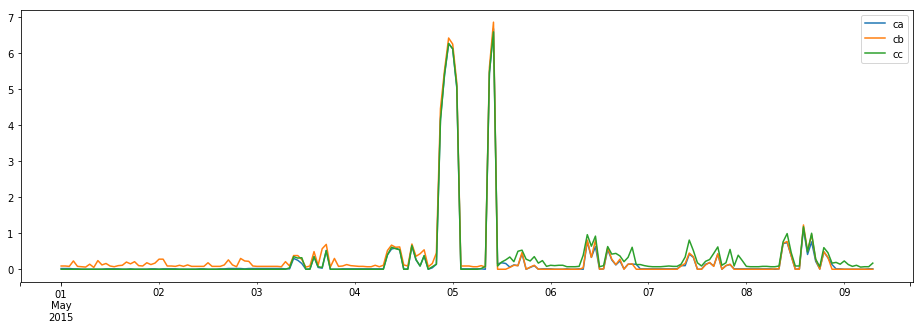

In [25]:

df.iloc[:200, [3, 4, 5]].plot(figsize=(16, 5))
plt.show()

In [17]:
dv = pd.read_csv('data/DV00801317.csv', index_col=0, names=['va', 'vb', 'vc', 'pt'])
dl = pd.read_csv('data/DL00801317.csv', index_col=0, names=['ca', 'cb', 'cc', 'ct'])
fh = pd.read_csv('data/FH00801317.csv', index_col=0, header=None)

In [18]:
fh = fh[[1, 2, 3, 4, 13, 14, 15, 16]]
dv = dv[['va', 'vb', 'vc']]
dl = dl[['ca', 'cb', 'cc']]
dv.index = pd.to_datetime(dv.index)
dl.index = pd.to_datetime(dl.index)
fh.index = pd.to_datetime(fh.index)
dv = dv.resample('H').mean()
dv = dv.sort_index()
dl = dl.resample('H').mean()
dl = dl.sort_index()
fh = fh.resample('H').mean()
fh = fh.sort_index()

In [20]:
dv.dropna()

,va,vb,vc
